In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snsd

In [56]:
df=pd.read_csv('income.csv')
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


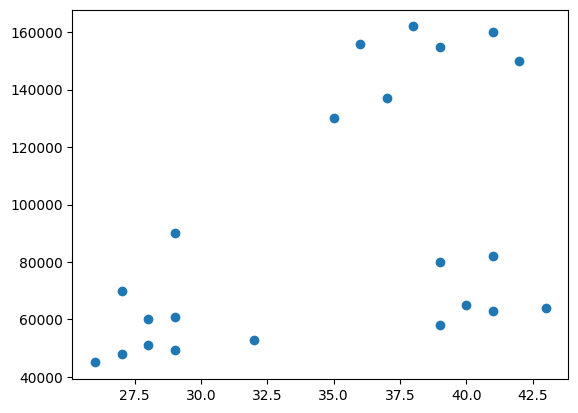

In [57]:
plt.scatter(df['Age'],df['Income($)'])

In [58]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [59]:
y_predicted=km.fit_predict(df[['Age','Income($)']])
df['cluster']=y_predicted
df

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,2


In [60]:
df.drop(['Name'],axis=1,inplace=True)
df

,Age,Income($),cluster
0,27,70000,0
1,29,90000,0
2,29,61000,0
3,28,60000,0
4,42,150000,1
5,39,155000,1
6,41,160000,1
7,38,162000,1
8,36,156000,1
9,35,130000,2


In [61]:
df1=df.loc[df['cluster']==0]
df2=df.loc[df['cluster']==1]
df3=df.loc[df['cluster']==2]

df1

,Age,Income($),cluster
0,27,70000,0
1,29,90000,0
2,29,61000,0
3,28,60000,0
11,26,45000,0
12,27,48000,0
13,28,51000,0
14,29,49500,0
15,32,53000,0
16,40,65000,0


In [62]:
df2

,Age,Income($),cluster
4,42,150000,1
5,39,155000,1
6,41,160000,1
7,38,162000,1
8,36,156000,1


In [63]:
df3

,Age,Income($),cluster
9,35,130000,2
10,37,137000,2


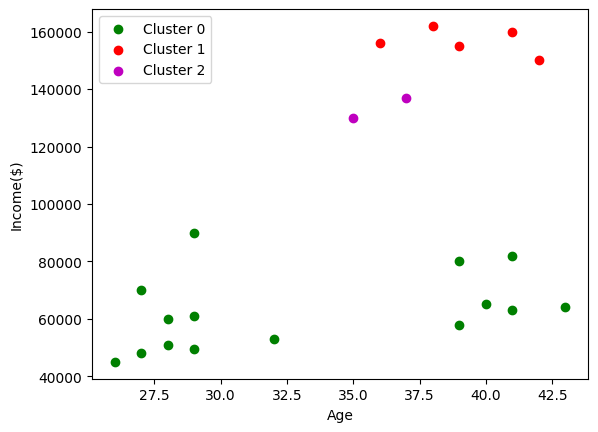

In [64]:
plt.scatter(df1['Age'],df1['Income($)'],color='green',label='Cluster 0')
plt.scatter(df2['Age'],df2['Income($)'],color='red', label='Cluster 1')
plt.scatter(df3['Age'],df3['Income($)'],color='m', label='Cluster 2')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df['Age']=scaler.fit_transform(df[['Age']])
df['Income($)']=scaler.fit_transform(df[['Income($)']])
df

,Age,Income($),cluster
0,0.058824,0.213675,0
1,0.176471,0.384615,0
2,0.176471,0.136752,0
3,0.117647,0.128205,0
4,0.941176,0.897436,1
5,0.764706,0.940171,1
6,0.882353,0.982906,1
7,0.705882,1.000000,1
8,0.588235,0.948718,1
9,0.529412,0.726496,2


In [66]:
km=KMeans(n_clusters=3)
df['cluster']=km.fit_predict(df[['Age','Income($)']])

In [67]:
km.cluster_centers_


array([[0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428]])

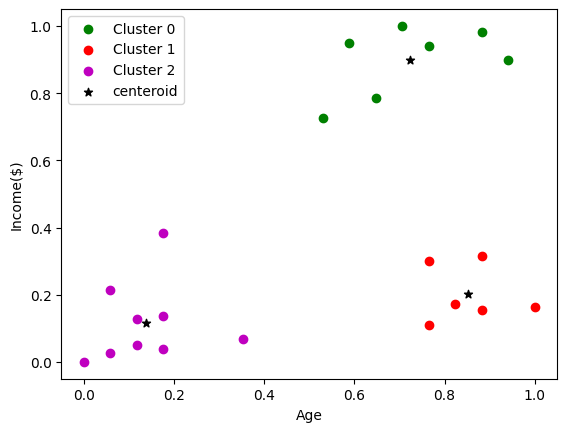

In [68]:
df1=df.loc[df['cluster']==0]
df2=df.loc[df['cluster']==1]
df3=df.loc[df['cluster']==2]

plt.scatter(df1['Age'],df1['Income($)'],color='green',label='Cluster 0')
plt.scatter(df2['Age'],df2['Income($)'],color='red', label='Cluster 1')
plt.scatter(df3['Age'],df3['Income($)'],color='m', label='Cluster 2')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='k',marker='*',label='centeroid')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [69]:
df

,Age,Income($),cluster
0,0.058824,0.213675,2
1,0.176471,0.384615,2
2,0.176471,0.136752,2
3,0.117647,0.128205,2
4,0.941176,0.897436,0
5,0.764706,0.940171,0
6,0.882353,0.982906,0
7,0.705882,1.000000,0
8,0.588235,0.948718,0
9,0.529412,0.726496,0


Elbow Method
------------

In [70]:
sse=[]
k_range=range(1,10)
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

In [71]:
sse

[5.434011511988179,
 2.4571335359046356,
 0.4750783498553096,
 0.34910470944195654,
 0.35644572879234865,
 0.22462070560435102,
 0.18792544515195572,
 0.1420361384295375,
 0.12495051760718816]

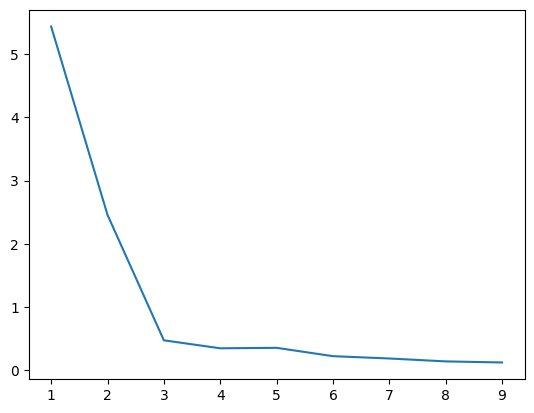

In [72]:
plt.plot(k_range,sse)